In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import morton
import os
import numpy as np
from scipy.interpolate import CubicSpline
from scipy.interpolate import splrep
from scipy.interpolate import splev
#from scipy.interpolate.BSpline import bspline
#from hilbertcurve.hilbertcurve import HilbertCurve

In [37]:
OFFSET = 10
FACTOR_MULTIPLY = 10000

In [38]:
m = morton.Morton(dimensions=2, bits=18)

def set_value(row):
    return m.pack(int(row['IMULatAcceleration']), int(row['SteeringWhlAngle']))

#df['morton'] = df.apply(set_value, axis=1)
#df

In [39]:
folderToView = "data/2022-09-21_LaneChanges/Extracted_CleanLaneChanges/Right_LCs/"

#dfJagged 
dfSmooth = pd.read_csv(f'{folderToView}/lane_change_31.csv', sep=';')

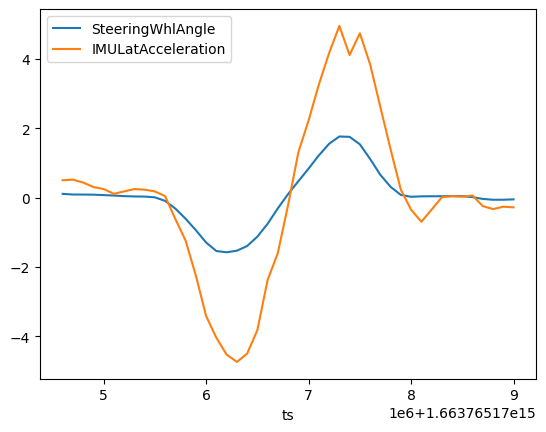

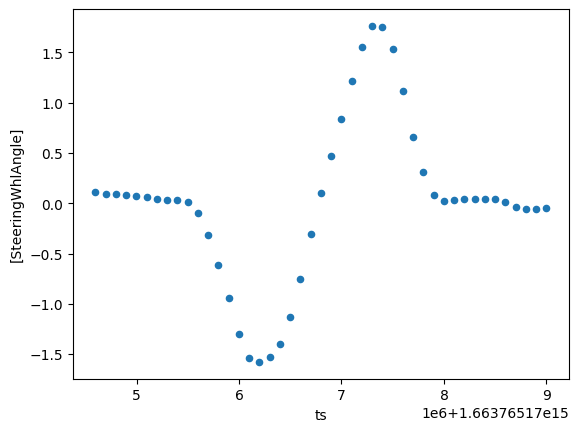

In [40]:
 # outputting in same row based on: https://towardsdatascience.com/plot-multiple-graphics-in-the-same-figure-using-python-1cbe5a23e89f and https://www.statology.org/pandas-subplots/ and https://stackoverflow.com/questions/49006699/plot-two-pandas-data-frames-side-by-side-each-in-subplot-style
#fig, ax = plt.subplots()

# OUTPUT IN ONE ROW
# output: sensor against ts
dfSmooth.plot(x='ts', y=['SteeringWhlAngle', 'IMULatAcceleration'])
dfSmooth.plot.scatter(x='ts', y=['SteeringWhlAngle'])
#ax[0].set_xlabel('Timestamp (Microseconds)', fontsize=8)
#ax[0].set_ylabel('Steering Angle (°) | Lateral Acceleration (m/s\u00B2)', fontsize=8)
#ax[0].set_title('Lateral acceleration and Steering angle against Timestamp', fontsize=12)

plt.show()

In [41]:
differences = np.diff(dfSmooth['SteeringWhlAngle'])
print(differences)

[-0.01953125 -0.00097656 -0.00292969 -0.01269531 -0.01269531 -0.01757812
 -0.00878906 -0.00390625 -0.02148438 -0.10253906 -0.22363281 -0.29199219
 -0.33007812 -0.35644531 -0.24511719 -0.03613281  0.04589844  0.13378906
  0.27148438  0.37011719  0.44726562  0.41113281  0.37109375  0.36523438
  0.38085938  0.33496094  0.20996094 -0.00976562 -0.21484375 -0.421875
 -0.45898438 -0.34765625 -0.23242188 -0.0546875   0.01269531  0.00292969
  0.          0.00292969  0.         -0.02832031 -0.05175781 -0.0234375
  0.          0.01074219]


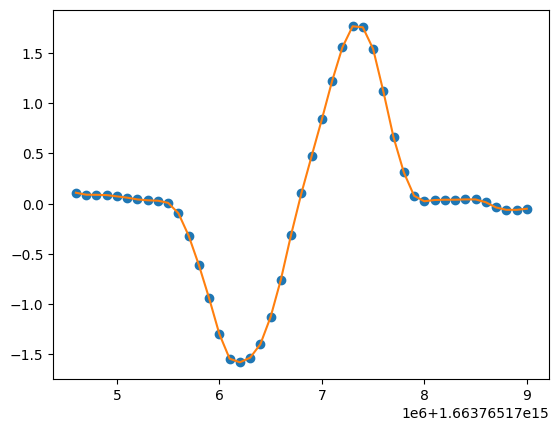

In [42]:
cs = CubicSpline(dfSmooth['ts'], dfSmooth['SteeringWhlAngle'])

fig, ax = plt.subplots()

ax.plot(dfSmooth['ts'], dfSmooth['SteeringWhlAngle'], 'o', label="data")

y_spline = cs(dfSmooth['ts'])
ax.plot(dfSmooth['ts'], y_spline, label='cubicSpline')
plt.show()

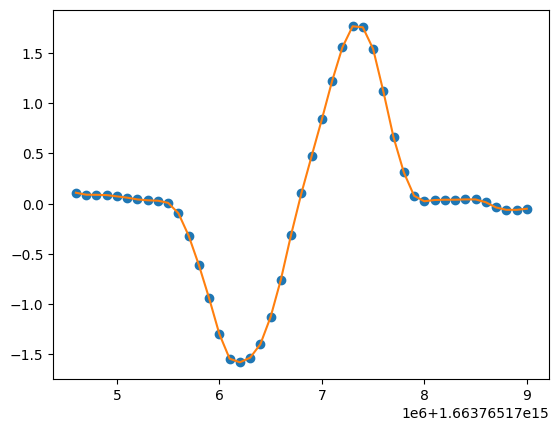

In [53]:
spl = splrep(dfSmooth['ts'], dfSmooth['SteeringWhlAngle'], k=3)

ySpline = splev(dfSmooth['ts'], spl)


#fig, ax = plt.subplots()

#ax.plot(dfSmooth['ts'], dfSmooth['SteeringWhlAngle'], 'o', label="data")

#y_spline = cs(dfSmooth['ts'])
#ax.plot(dfSmooth['ts'], y_spline, label='cubicSpline')

plt.plot( dfSmooth['ts'], dfSmooth['SteeringWhlAngle'], 'o', dfSmooth['ts'], ySpline)
plt.show()

<Axes: xlabel='ts', ylabel='[SteeringWhlAngle]'>

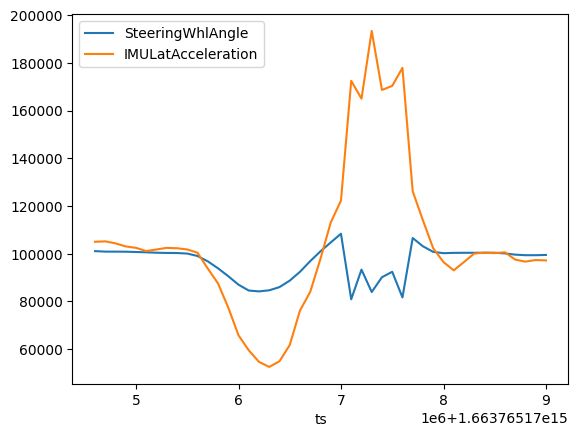

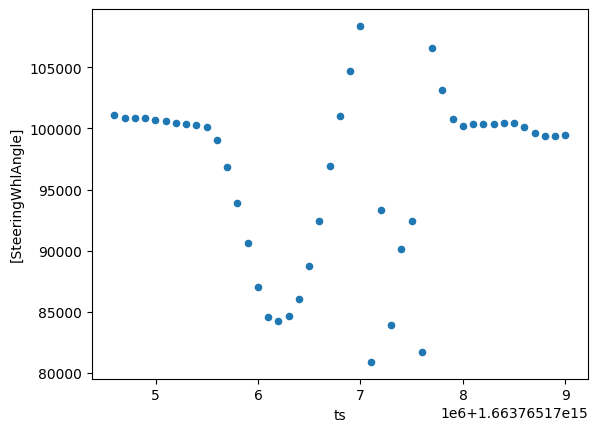

In [55]:
folderToView = "data/2022-09-21_LaneChanges/Extracted_CleanLaneChanges/Right_LCs/"

#dfJagged 
dfinvalid31 = pd.read_csv(f'{folderToView}/lane_change_31_manipulated_invalid_lc.csv', sep=';')

dfinvalid31.plot(x='ts', y=['SteeringWhlAngle', 'IMULatAcceleration'])
dfinvalid31.plot.scatter(x='ts', y=['SteeringWhlAngle'])

true
101083
101083
true
100888
100888
true
100878
100878
true
100849
100849
true
100722
100722
true
100595
100595
true
100419
100419
true
100332
100332
true
100292
100292
true
100078
100078
true
99052
99052
true
96816
96816
true
93896
93896
true
90595
90595
true
87031
87031
true
84580
84580
true
84218
84218
true
84677
84677
true
86015
86015
true
88730
88730
true
92431
92431
true
96904
96904
true
101015
101015
true
104726
104726
true
108378
108378
true
80907
80907
true
93345
93345
true
83956
83956
true
90163
90163
true
92430
92430
true
81683
81683
true
106582
106582
true
103105
103105
true
100781
100781
true
100234
100234
true
100361
100361
true
100390
100390
true
100390
100390
true
100419
100419
true
100419
100419
true
100136
100136
true
99619
99619
true
99384
99384
true
99384
99384
true
99492
99492
[-3.60916696e-03 -6.57327188e-04  8.86487106e-05 -8.69765682e-04
 -1.28872832e-03 -1.58568893e-03 -1.46693822e-03 -4.51821098e-04
 -5.31665285e-04 -5.05611262e-03 -1.64545223e-02 -2.6794493

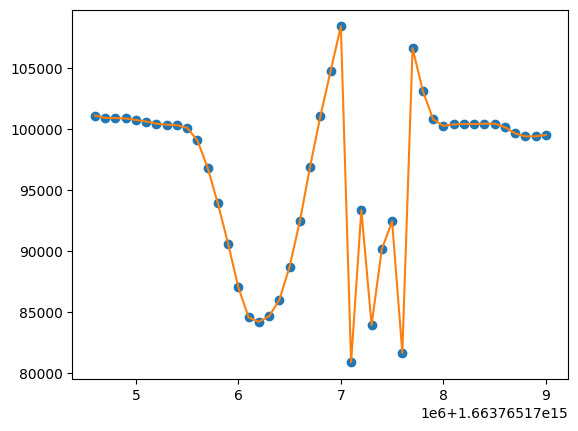

In [77]:
spl = splrep(dfinvalid31['ts'], dfinvalid31['SteeringWhlAngle'], k=3)

ySpline = splev(dfinvalid31['ts'], spl)
#print(ySpline.tolist())
#print(dfinvalid31['SteeringWhlAngle'].values.tolist())
for val, val2 in zip(dfinvalid31['SteeringWhlAngle'].values.tolist(), ySpline.tolist()):
    if val == round(val2):
        print('true')
        print(val)
        print(round(val2))
    
#print(ySpline == dfinvalid31['SteeringWhlAngle'].values.tolist())

dYdT = splev(dfinvalid31['ts'], spl, der=1)
print(dYdT)

print(len(dYdT))
print(len(dfinvalid31['SteeringWhlAngle']))




plt.plot( dfinvalid31['ts'], dfinvalid31['SteeringWhlAngle'], 'o', dfinvalid31['ts'], ySpline)
plt.show()

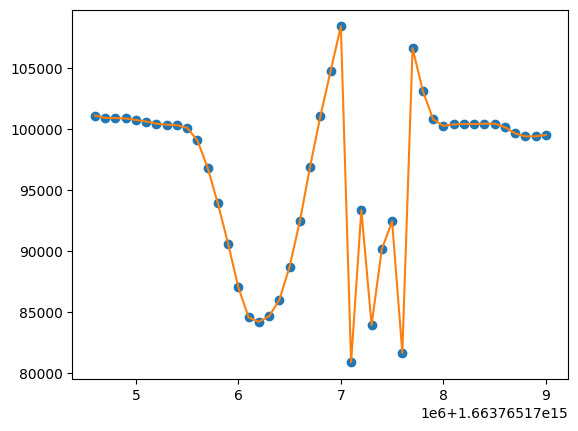

In [47]:
cs = CubicSpline(dfinvalid31['ts'], dfinvalid31['SteeringWhlAngle'])

fig, ax = plt.subplots()

ax.plot(dfinvalid31['ts'], dfinvalid31['SteeringWhlAngle'], 'o', label="data")

y_spline = cs(dfinvalid31['ts'])
ax.plot(dfinvalid31['ts'], y_spline, label='cubicSpline')
plt.show()

In [49]:
print(cs.x)

[1.66376517e+15 1.66376517e+15 1.66376517e+15 1.66376517e+15
 1.66376517e+15 1.66376518e+15 1.66376518e+15 1.66376518e+15
 1.66376518e+15 1.66376518e+15 1.66376518e+15 1.66376518e+15
 1.66376518e+15 1.66376518e+15 1.66376518e+15 1.66376518e+15
 1.66376518e+15 1.66376518e+15 1.66376518e+15 1.66376518e+15
 1.66376518e+15 1.66376518e+15 1.66376518e+15 1.66376518e+15
 1.66376518e+15 1.66376518e+15 1.66376518e+15 1.66376518e+15
 1.66376518e+15 1.66376518e+15 1.66376518e+15 1.66376518e+15
 1.66376518e+15 1.66376518e+15 1.66376518e+15 1.66376518e+15
 1.66376518e+15 1.66376518e+15 1.66376518e+15 1.66376518e+15
 1.66376518e+15 1.66376518e+15 1.66376518e+15 1.66376518e+15
 1.66376518e+15]
